In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings("ignore")

In [51]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [52]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [53]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [54]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


,Count,Ratio
Survived,,
0,549,61.616162
1,342,38.383838


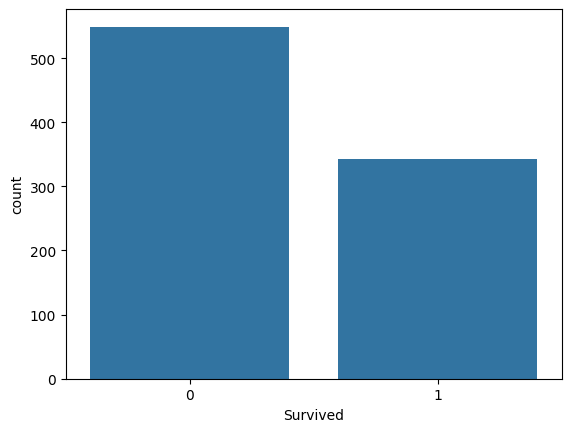

In [55]:
sns.countplot(data=train_df, x="Survived")
pd.DataFrame({
    "Count": train_df["Survived"].value_counts(),
    "Ratio": train_df["Survived"].value_counts(normalize=True) * 100
})

#print(train_df["Survived"].value_counts())

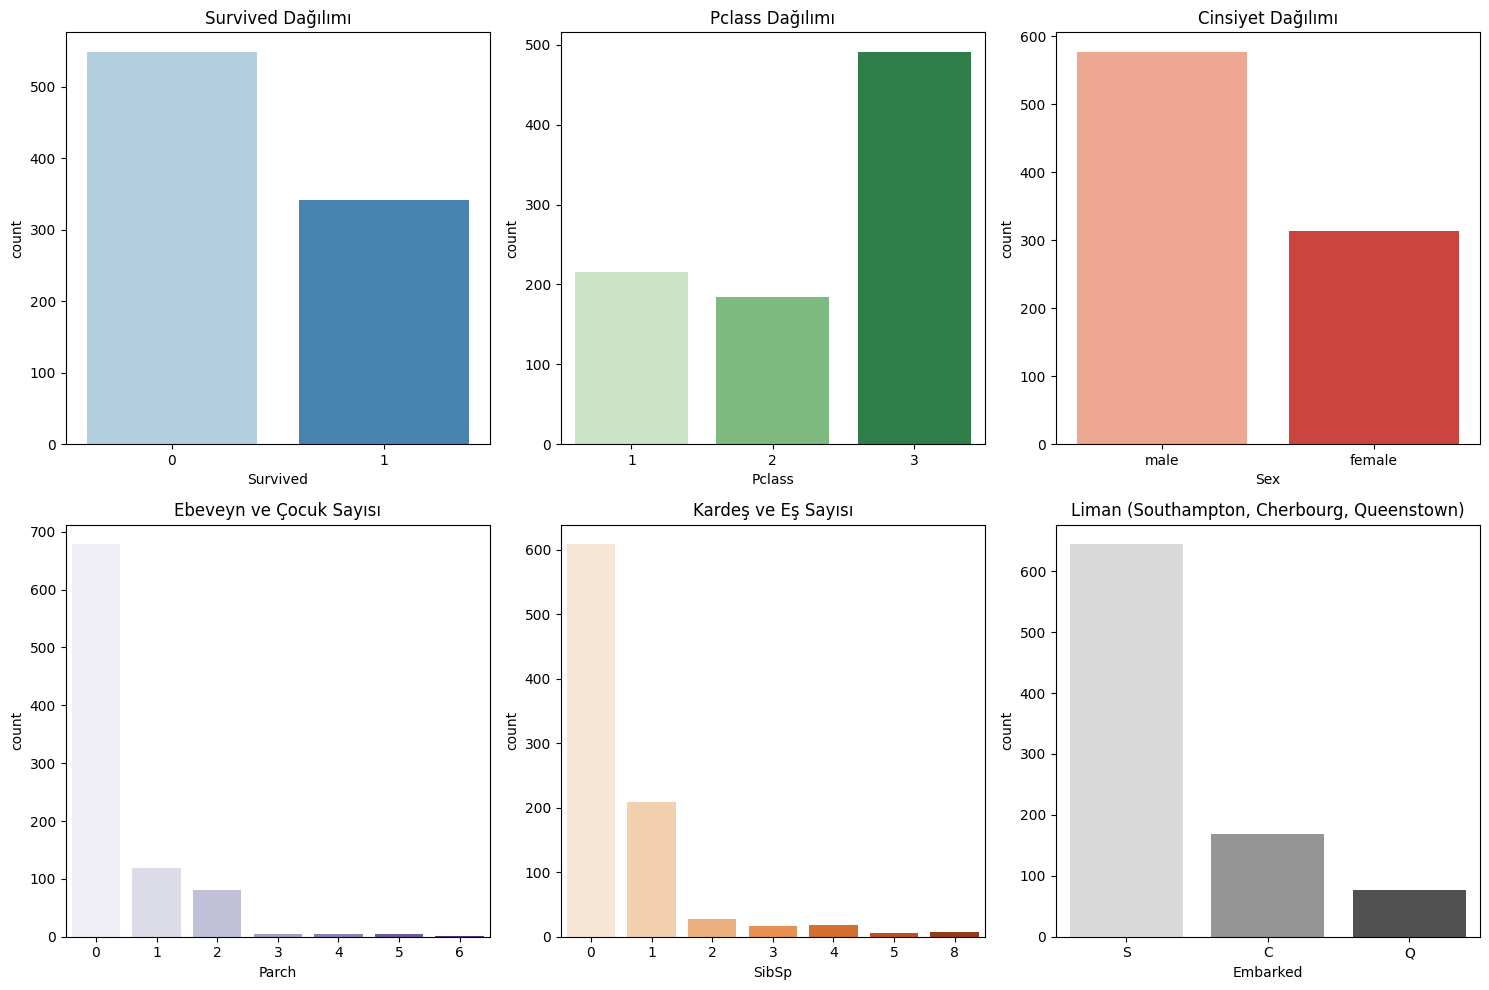

In [56]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

sns.countplot(data=train_df, x="Survived", ax=axes[0, 0], palette="Blues")
axes[0, 0].set_title("Survived Dağılımı")

sns.countplot(data=train_df, x="Pclass", ax=axes[0, 1], palette="Greens")
axes[0, 1].set_title("Pclass Dağılımı")

sns.countplot(data=train_df, x="Sex", ax=axes[0, 2], palette="Reds")
axes[0, 2].set_title("Cinsiyet Dağılımı")

sns.countplot(data=train_df, x="Parch", ax=axes[1, 0], palette="Purples")
axes[1, 0].set_title("Ebeveyn ve Çocuk Sayısı")

sns.countplot(data=train_df, x="SibSp", ax=axes[1, 1], palette="Oranges")
axes[1, 1].set_title("Kardeş ve Eş Sayısı")

sns.countplot(data=train_df, x="Embarked", ax=axes[1, 2], palette="Greys")
axes[1, 2].set_title("Liman (Southampton, Cherbourg, Queenstown)")

plt.tight_layout()
plt.show()


<Axes: xlabel='Age', ylabel='Density'>

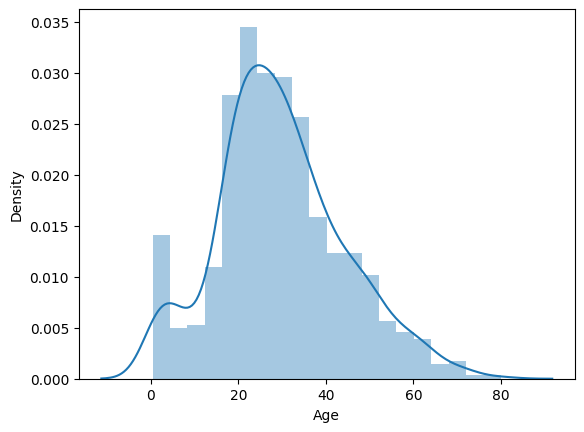

In [57]:
sns.distplot(train_df["Age"])

<Axes: xlabel='Fare', ylabel='Density'>

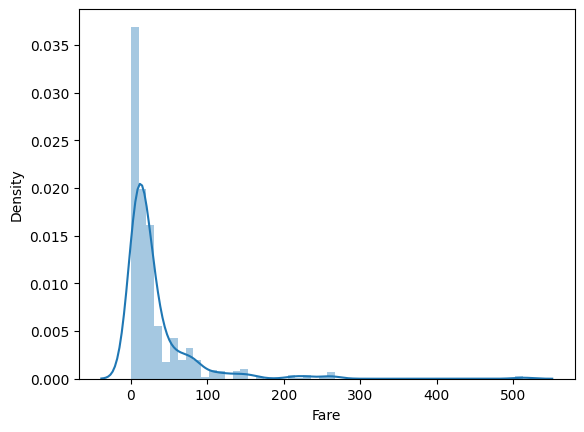

In [58]:
sns.distplot(train_df["Fare"])

<Axes: xlabel='Pclass', ylabel='Fare'>

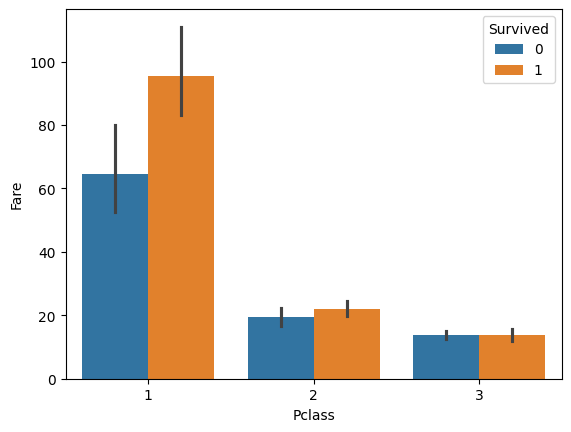

In [59]:
sns.barplot(data=train_df, x="Pclass", y="Fare", hue="Survived")

In [60]:
df = pd.concat([train_df, test_df], axis=0)
df = df.reset_index(drop=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [61]:
df.isnull().sum()

,0
PassengerId,0
Survived,418
Pclass,0
Name,0
Sex,0
Age,263
SibSp,0
Parch,0
Ticket,0
Fare,1


In [62]:
df = df.drop(columns=["Cabin", "Name", "Ticket", "PassengerId"], axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3,male,22.0,1,0,7.2500,S
1,1.0,1,female,38.0,1,0,71.2833,C
2,1.0,3,female,26.0,0,0,7.9250,S
3,1.0,1,female,35.0,1,0,53.1000,S
4,0.0,3,male,35.0,0,0,8.0500,S


In [63]:
df["Age"].mean()

29.881137667304014

In [64]:
df["Age"].median()

28.0

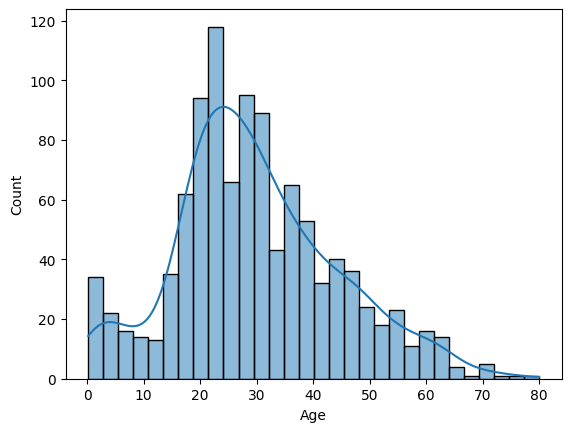

In [65]:
sns.histplot(df["Age"], bins=30, kde=True)
plt.show()

In [66]:
df["Age"].fillna(df["Age"].median(), inplace=True)
# ortalama ile median arasında çok fark yok ama yaş grafği hafif çarpık olduğundan medianı tercih ettim.
df["Fare"].fillna(df["Fare"].mean(), inplace=True)

df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

In [67]:
df.isnull().sum()

,0
Survived,418
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


<Axes: xlabel='Fare', ylabel='Count'>

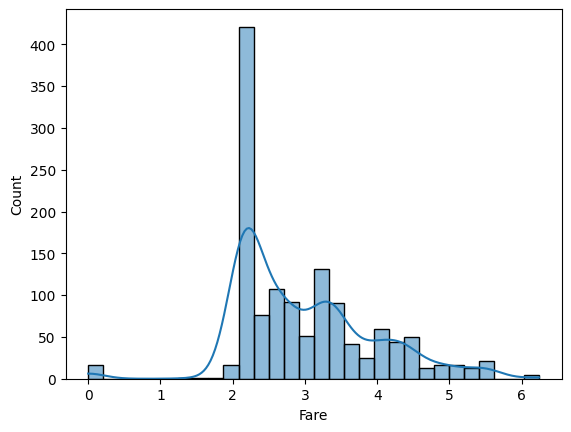

In [68]:
df["Fare"] = np.log(df["Fare"] + 1)

sns.histplot(df["Fare"], bins=30, kde=True)

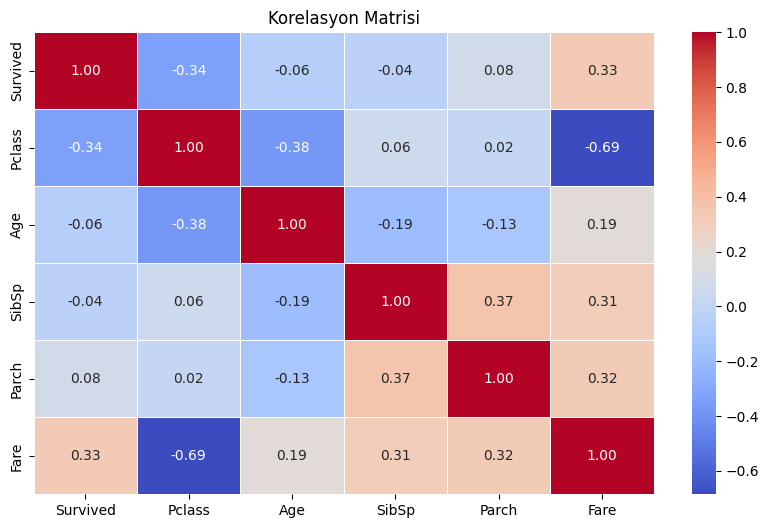

In [69]:
corr = df.select_dtypes(include=["number"]).corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Korelasyon Matrisi")
plt.show()

In [70]:
cols = ["Sex", "Embarked"]
le = LabelEncoder()
for col in cols:
  df[col] = le.fit_transform(df[col])

df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3,1,22.0,1,0,2.110213,2
1,1.0,1,0,38.0,1,0,4.280593,0
2,1.0,3,0,26.0,0,0,2.188856,2
3,1.0,1,0,35.0,1,0,3.990834,2
4,0.0,3,1,35.0,0,0,2.202765,2


In [71]:
train_len = len(train_df)
train = df.iloc[:train_len, :]
test = df.iloc[train_len:, :]


In [72]:
X = train.drop(columns=["Survived"])
y = train["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    cross_val_accuracy = cross_val_score(model, X, y, cv=5, scoring='accuracy')

    print(f"{name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    print(f"CV Scores: {cross_val_accuracy}")
    print(f"Average CV Score: {cross_val_accuracy.mean():.4f}")

    print("-" * 30)

Logistic Regression:
Accuracy: 0.7989
Precision: 0.7714
Recall: 0.7297
F1 Score: 0.7500
CV Scores: [0.7877095  0.78089888 0.76966292 0.76966292 0.82022472]
Average CV Score: 0.7856
------------------------------
Decision Tree:
Accuracy: 0.7821
Precision: 0.7215
Recall: 0.7703
F1 Score: 0.7451
CV Scores: [0.74860335 0.79213483 0.80898876 0.73595506 0.81460674]
Average CV Score: 0.7801
------------------------------
Random Forest:
Accuracy: 0.8212
Precision: 0.8088
Recall: 0.7432
F1 Score: 0.7746
CV Scores: [0.77094972 0.81460674 0.86516854 0.7752809  0.82022472]
Average CV Score: 0.8092
------------------------------
KNN:
Accuracy: 0.7877
Precision: 0.7903
Recall: 0.6622
F1 Score: 0.7206
CV Scores: [0.74860335 0.7752809  0.76966292 0.81460674 0.78651685]
Average CV Score: 0.7789
------------------------------
